# Jugo project

## Introduction

The goal for our project is to make an accurate system, potentially developed into an app for our 
client that makes him a time-saving daily schedule where it is shown how long it would take him to 
travel to both locations,  based on weather and traffic data.


In this project, we will be working with three distinct datasets. Each dataset will undergo a thorough examination to identify and perform necessary data cleaning and preprocessing steps. Oncethis is completed, the datasets will bemergedd into a single, unified dataset. Finally, we will apply a Gradient Boosting Machine model to train on this integrated dataset.Now, we would import the first out of the three dataframes:.

## Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Weather data
The weather data that is imported here is taken from the **WeatherDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a description about the different column name meanings.
### Importing the data

In [22]:
df = pd.read_csv("datasets/CleanWeather.csv")
df.head()

,Date (YYYY-MM-DD),Station ID,Hour,Hourly Average Wind Speed (m/s),Wind Speed (m/s),Highest Wind Gust (m/s),Temperature (0.1°C),Duration of Precipitation (hours),Precipitation Amount (mm),Visibility (m),Fog Indicator,Rainfall Indicator,Snow Indicator,Thunderstorm Indicator,Ice Formation Indicator,Month,Season,DOP Sector
0,1951-01-01,380,23,98.000000,0.0,90.158365,22.0,0.0,0.83167,53.267449,0.0,0.0,0.0,0.0,0.0,1,Winter,0
1,1951-01-01,310,3,87.000000,87.0,89.262892,14.0,0.0,0.83167,51.162157,0.0,0.0,0.0,0.0,0.0,1,Winter,0
2,1951-01-01,310,2,93.000000,0.0,89.261606,11.0,0.0,0.83167,51.603766,0.0,0.0,0.0,0.0,0.0,1,Winter,0
3,1951-01-01,310,1,93.000000,0.0,89.371168,9.0,0.0,0.83167,52.037477,0.0,0.0,0.0,0.0,0.0,1,Winter,0
4,1951-01-01,290,24,60.025576,62.0,89.727013,21.0,0.0,0.83167,52.616341,0.0,0.0,0.0,0.0,0.0,1,Winter,0


In [23]:
df.shape

(19188675, 18)

In [25]:
df = df[["Date (YYYY-MM-DD)", "Station ID", "Hour", "Month"]]

### Checking missing data and data types

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188675 entries, 0 to 19188674
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Date (YYYY-MM-DD)  object
 1   Station ID         int64 
 2   Hour               int64 
 3   Month              int64 
dtypes: int64(3), object(1)
memory usage: 585.6+ MB


In [27]:
df.isna().sum()

Date (YYYY-MM-DD)    0
Station ID           0
Hour                 0
Month                0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Traffic data
The traffic data that is imported here is taken from the **TrafficDataCleaning file**, where detailed steps about the cleaning of the dataset have been specified as well as a data dictionary with data requirements. 
### Importing the data

In [28]:
traffic_data = pd.read_csv("datasets/CleanTraffic.csv")
traffic_data.head()

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.0,5.617,45.6,47.9,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.0,14.533,31.4,28.2,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.0,1.600,166.5,169.7,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.0,11.517,82.8,85.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.0,9.517,144.3,140.6,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00


In [29]:
traffic_data.shape

(1581413, 28)

### Checking the data types and missing values

In [30]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581413 entries, 0 to 1581412
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TrafficJamNum        1581413 non-null  int64  
 1   StartDate            1581413 non-null  object 
 2   EndDate              1581413 non-null  object 
 3   StartTime            1581413 non-null  object 
 4   EndTime              1581413 non-null  object 
 5   Severity             1581413 non-null  float64
 6   Length               1581413 non-null  float64
 7   Duration             1581413 non-null  float64
 8   HectometerStart      1581413 non-null  float64
 9   HectometerEnd        1581413 non-null  float64
 10  RoadLetter           1581413 non-null  object 
 11  RoadNumber           1581413 non-null  int64  
 12  RoadDescr            1581413 non-null  object 
 13  HectometerDirection  1581413 non-null  object 
 14  RoadSectionFrom      1581413 non-null  object 
 15

In [31]:
traffic_data.isna().sum()

TrafficJamNum          0
StartDate              0
EndDate                0
StartTime              0
EndTime                0
Severity               0
Length                 0
Duration               0
HectometerStart        0
HectometerEnd          0
RoadLetter             0
RoadNumber             0
RoadDescr              0
HectometerDirection    0
RoadSectionFrom        0
RoadSectionTo          0
MainRoadFrom           0
MainRoadTo             0
CauseCodeDescr         0
CauseClass             0
CauseCodeClass         0
CauseCode              0
Cause_1                0
Cause_2                0
Cause_3                0
Cause_4                0
StartDateTime          0
EndDateTime            0
dtype: int64

It can be concluded that the file got imported correctly and is ready to be used further.

## Weather stations data
The traffic data that is imported here is taken from the **WeatherStations&InitialEDA** file, where detailed steps about the cleaning of the dataset have been specified as well as a short data exploration.

### Importing the data and checking its quality

In [32]:
weather_stations = pd.read_csv("datasets/weather_stations.csv")
weather_stations.head()

,STN,LON(east),LAT(north),ALT(m),NAME
0,209,4.518,52.465,0.0,IJmond
1,210,4.430,52.171,-0.2,Valkenburg Zh
2,215,4.437,52.141,-1.1,Voorschoten
3,225,4.555,52.463,4.4,IJmuiden
4,235,4.781,52.928,1.2,De Kooy


In [33]:
weather_stations.shape

(50, 5)

In [34]:
weather_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STN         50 non-null     int64  
 1   LON(east)   50 non-null     float64
 2   LAT(north)  50 non-null     float64
 3   ALT(m)      50 non-null     float64
 4   NAME        50 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


We can see that the datatypes seem to correspong to what is expected for each column.

In [35]:
weather_stations.isna().sum()

STN           0
LON(east)     0
LAT(north)    0
ALT(m)        0
NAME          0
dtype: int64

There seem to be no NAs in our data and the data types are correct. The rest of the exloration and cleaning of this dataset can be found in the **WeatherStations&InitialEDA** file. Therefore, it can be concluded that the data can be used further.

### Relevant weather stations
It might be relevant that we consider only data from weather stations that are close to the cities of interest. Initially, we tried considering the closest 3 stations to each city that our customer needs to travel to. However, due to large number of data, we were forced to reduce it to only one weather station per city. Below, I calculate the exact distance, in km, from the closest weather station for each city, as well as the number of the specific station.

In [36]:
from geopy.distance import geodesic

# Coordinates of Hertogenbosch, Sittard, and Boxmeer
cities = {
    'Hertogenbosch': (51.6978, 5.3037),
    'Sittard': (50.9989, 5.866),
    'Boxmeer': (51.6444, 5.9473)
}

# Function to calculate distance between two points using geopy
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Calculate distances for each city and sort weather stations based on distance
closest_stations = {}
for city, city_coords in cities.items():
    distances = {}
    for index, row in weather_stations.iterrows():
        station_coords = (row['LAT(north)'], row['LON(east)'])
        station_id = row['STN']
        distance = calculate_distance(city_coords, station_coords)
        distances[station_id] = distance
    closest_stations[city] = sorted(distances.items(), key=lambda x: x[1])[:2]

# Print the closest weather stations for each city
for city, stations in closest_stations.items():
    print(f"Closest weather stations to {city}:")
    for station_id, distance in stations:
        print(f"Station ID: {station_id}, Distance: {distance:.2f} km")
    print()

Closest weather stations to Hertogenbosch:
Station ID: 356, Distance: 20.98 km
Station ID: 370, Distance: 27.93 km

Closest weather stations to Sittard:
Station ID: 380, Distance: 12.66 km
Station ID: 377, Distance: 23.30 km

Closest weather stations to Boxmeer:
Station ID: 375, Distance: 16.71 km
Station ID: 391, Distance: 23.77 km



### New left join

In [37]:
leftnew = pd.read_csv("datasets/LeftJoin.csv")
leftnew.sample(5)

,StartDate,Hour,Duration,RoadNumber,HectometerDirectionNum,Severity
64809,2019-06-20,15,29.533,2.0,0.0,76.117
476429,2024-02-08,8,1.567,73.0,1.0,3.290
341574,2019-07-25,17,0.000,73.0,0.0,0.000
404224,2016-11-18,17,0.000,73.0,1.0,0.000
190678,2017-09-25,16,6.200,2.0,1.0,7.433


In [38]:
leftnew['StartDate'] = pd.to_datetime(leftnew['StartDate'])
leftnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477126 entries, 0 to 477125
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   StartDate               477126 non-null  datetime64[ns]
 1   Hour                    477126 non-null  int64         
 2   Duration                477126 non-null  float64       
 3   RoadNumber              477126 non-null  float64       
 4   HectometerDirectionNum  477126 non-null  float64       
 5   Severity                477126 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 21.8 MB


# Data joining
## Data preparation for joining
### Weather data

As we want to join based on only the closest weather station to each city of interest, we store these stations' names in a variable, that we later use to filter the weather data to only display records that are coming from the stations of interest. 

In [39]:
unique_ids = set(id_ for station_list in closest_stations.values() for id_, _ in station_list)
unique_ids

{356, 370, 375, 377, 380, 391}

Apart from the weather stations, another important factor for the join is the date. We want to make sure that the dates in both dataset start and end at the same time.

In [40]:
print("Traffic data start:", traffic_data['StartDate'].min())
print("Traffic data end:", traffic_data['StartDate'].max())
print("Weather data start:", df['Date (YYYY-MM-DD)'].min())
print("Weather data end:", df['Date (YYYY-MM-DD)'].max())

max_start_date = max(traffic_data['StartDate'].min(), df['Date (YYYY-MM-DD)'].min())
min_end_date = min(traffic_data['StartDate'].max(), df['Date (YYYY-MM-DD)'].max())
print("--------------------------------------")
print("Start date:", max_start_date)
print("End date:", min_end_date)

Traffic data start: 2015-01-01
Traffic data end: 2024-02-29
Weather data start: 1951-01-01
Weather data end: 2024-03-25
--------------------------------------
Start date: 2015-01-01
End date: 2024-02-29


In [41]:
filtered_weather_data = df[(df['Date (YYYY-MM-DD)'] >= max_start_date) & (df['Date (YYYY-MM-DD)'] <= min_end_date)]
print("Minimum date:", filtered_weather_data['Date (YYYY-MM-DD)'].min(), "and maximum date:", filtered_weather_data['Date (YYYY-MM-DD)'].max())

Minimum date: 2015-01-01 and maximum date: 2024-02-29


In [42]:
filtered_weather_data = filtered_weather_data[filtered_weather_data['Station ID'].isin(unique_ids)]
print(filtered_weather_data.shape)
filtered_weather_data.sample(3)

(481968, 4)


,Date (YYYY-MM-DD),Station ID,Hour,Month
18945010,2023-08-18,356,21,8
17594160,2020-04-17,380,24,4
17607661,2020-04-29,356,13,4


After filtering for the relevant stations, we still have around half a million observations in the weather dataset.

In [43]:
hourlyobservations = filtered_weather_data.groupby(['Station ID', 'Date (YYYY-MM-DD)', 'Hour']).size()
hourlyobservations = hourlyobservations.reset_index(name='NumObs')
print("Min number of observations per hour:", hourlyobservations['NumObs'].min())
print("Max number of observations per hour:", hourlyobservations['NumObs'].max())

Min number of observations per hour: 1
Max number of observations per hour: 1


It seems that we have the weather indicators measured 1 time per hour in each relevant station. Therefore, we need to come up with a solution that would allow us to make sure that for each traffic jam we have weather data in place.

### Traffic data

It looks like there might be observations that contain traffic jams that continued from one day until the other. Therefore, when joining we need to carefully consider whether we want to join based on the start or end date and time.

In [44]:
traffic_data[traffic_data['StartDate'] != traffic_data['EndDate']] 

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
6536,3568729,2023-06-03,2023-06-04,23:52:22,0:31:03,111.825,2891.000,38.683,62.6,59.0,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 4], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-03 23:52:22,2023-06-04 00:31:03
11132,3571530,2023-06-05,2023-06-06,23:54:20,0:51:48,208.273,3624.000,57.467,55.1,50.1,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 10], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:54:20,2023-06-06 00:51:48
11133,3571532,2023-06-05,2023-06-06,23:59:20,1:34:20,264.233,2781.000,95.000,79.1,76.7,...,Wegwerkzaamheden,"[Geen oorzaakcode opgegeven door VWM 5], [Wegw...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-05 23:59:20,2023-06-06 01:34:20
13722,3576406,2023-06-07,2023-06-08,21:13:25,0:42:54,597.529,2852.000,209.483,44.1,41.3,...,Werkzaamheden (en file buiten spits zonder oor...,"[Geen oorzaakcode opgegeven door VWM 59], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 21:13:25,2023-06-08 00:42:54
14007,3576426,2023-06-07,2023-06-08,22:13:23,0:07:33,284.758,2494.000,114.167,15.4,12.8,...,File buiten spits zonder oorzaak (met werkzaam...,"[Geen oorzaakcode opgegeven door VWM 60], [Weg...","[000], [RWK]",RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2023-06-07 22:13:23,2023-06-08 00:07:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565809,2762411,2020-06-06,2020-06-07,23:52:00,0:45:47,161.350,3000.000,53.783,88.4,91.4,...,Ongeval (met ander incident),"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [N03]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-06 23:52:00,2020-06-07 00:45:47
1565832,2761918,2020-06-03,2020-06-04,23:46:00,0:27:21,123.900,2996.372,41.350,126.0,124.0,...,Ongeval(len),[Ongeval(len) 41],[ACI],ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-06-03 23:46:00,2020-06-04 00:27:21
1569022,2811903,2021-04-16,2021-04-17,21:32:00,0:07:07,456.083,2940.260,155.117,29.6,31.6,...,Werkzaamheden op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [N65], [RWK], [N60]",N60,Werkzaamheden op aansluitende weg,Werkzaamheden elders,Werkzaamheden,Aanleg en gepland onderhoud,2021-04-16 21:32:00,2021-04-17 00:07:07
1578595,2798351,2020-12-30,2020-12-31,18:57:00,1:16:19,1549.400,4084.714,379.317,95.3,93.3,...,Ongeval vrachtwagen (met spoedreparatie),"[Ongeval(len) 16], [Ongeval met vrachtwagen(s)...","[ACI], [ACH], [N32]",ACH,Ongeval met vrachtwagen(s),Ongeval vrachtwagen,Ongeval,Ongeval,2020-12-30 18:57:00,2020-12-31 01:16:19


To join later on date and hour, we want to make a new column containing only the hour of the traffic jam start.

In [45]:
traffic_data['Hour'] = traffic_data['StartTime'].apply(lambda x: x.split(':')[0]).astype(int)
traffic_data

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
0,3589057,2023-06-13,2023-06-13,16:54:29,17:00:06,13.480,2400.000,5.617,45.6,47.9,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:00:06,16
1,3589058,2023-06-13,2023-06-13,16:54:29,17:09:01,46.287,3185.000,14.533,31.4,28.2,...,[Geen oorzaakcode opgegeven door VWM 15],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:09:01,16
2,3589060,2023-06-13,2023-06-13,16:54:29,16:56:05,5.120,3200.000,1.600,166.5,169.7,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 16:56:05,16
3,3589061,2023-06-13,2023-06-13,16:54:29,17:06:00,29.525,2564.000,11.517,82.8,85.6,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:06:00,16
4,3589062,2023-06-13,2023-06-13,16:54:29,17:04:00,28.952,3042.000,9.517,144.3,140.6,...,[Geen oorzaakcode opgegeven door VWM 10],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 16:54:29,2023-06-13 17:04:00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581408,2756774,2020-04-10,2020-04-10,6:31:00,7:14:41,102.150,2338.421,43.683,52.3,50.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Opru...","[000], [CLE]",CLE,Opruimwerkzaamheden,Opruimwerkzaamheden,Incident (opruimwerkzaamheden),Incident,2020-04-10 06:31:00,2020-04-10 07:14:41,6
1581409,2756818,2020-04-10,2020-04-10,16:46:00,17:35:32,139.217,2810.565,49.533,146.2,144.2,...,"[Opruimingswerkzaamheden 46], [Eerder(e) ongev...","[OCL], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-10 16:46:00,2020-04-10 17:35:32,16
1581410,2756726,2020-04-09,2020-04-09,14:14:00,14:17:40,7.333,2000.000,3.667,30.0,32.0,...,"[Geen oorzaakcode opgegeven door VWM 1], [Te h...","[000], [OHW], [000]",OHW,"Te hoog voertuig gesignaleerd, wordt afgehandeld",Hoogtemelding,Incident,Incident,2020-04-09 14:14:00,2020-04-09 14:17:40,14
1581411,2756735,2020-04-09,2020-04-09,16:03:00,16:15:27,25.900,2080.321,12.450,51.5,53.5,...,[Geen oorzaakcode opgegeven door VWM 12],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2020-04-09 16:03:00,2020-04-09 16:15:27,16


#### A2 and A73 

As we want to only have the specific roads that our client can possibly use to reach the offices, we will prepare the data for joining by filtering on the roads A2 and A73.
An important observation is that **A2 leads from Sittard to 's-Hertogenbosch** and vice versa, whereas **A73 leads from Sittard to Boxmeer** and vice versa. Other routes are also possible, but they are significantly slower. Therefore, it is better to focus on those two only for now. Furthermore, they have been suggested by the client as the optimal routes.

In [46]:
denb=traffic_data[(traffic_data["MainRoadFrom"] == "'s-Hertogenbosch")&(traffic_data["MainRoadTo"] == "Utrecht")]
denb["HectometerDirection"].unique()

array(['aflopend'], dtype=object)

In [47]:
filtered_traffic= traffic_data[(traffic_data['RoadDescr'] == 'A73') | (traffic_data['RoadDescr'] == 'A2')]
filtered_traffic

,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,HectometerEnd,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Hour
7,3589149,2023-06-13,2023-06-13,17:03:29,17:17:00,32.867,2432.000,13.517,115.9,118.1,...,[Geen oorzaakcode opgegeven door VWM 14],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 17:03:29,2023-06-13 17:17:00,17
41,3589794,2023-06-13,2023-06-13,18:37:28,18:43:00,16.465,2976.000,5.533,92.0,89.5,...,[Geen oorzaakcode opgegeven door VWM 6],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-13 18:37:28,2023-06-13 18:43:00,18
61,3590025,2023-06-14,2023-06-14,7:12:25,7:25:02,41.488,3288.000,12.617,43.8,41.4,...,[Geen oorzaakcode opgegeven door VWM 13],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:12:25,2023-06-14 07:25:02,7
66,3590065,2023-06-14,2023-06-14,7:25:25,8:07:00,216.928,5217.000,41.583,44.2,40.0,...,[Geen oorzaakcode opgegeven door VWM 42],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:25:25,2023-06-14 08:07:00,7
74,3590164,2023-06-14,2023-06-14,7:49:26,7:51:00,3.447,2200.000,1.567,105.5,103.3,...,[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-14 07:49:26,2023-06-14 07:51:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581317,2757675,2020-04-23,2020-04-23,12:12:00,12:32:56,57.350,2739.650,20.933,162.3,164.3,...,"[Geen oorzaakcode opgegeven door VWM 1], [Defe...","[000], [BKD], [000]",BKD,Defect(e) voertuig(en),Defect voertuig,Incident (gestrand voertuig),Incident,2020-04-23 12:12:00,2020-04-23 12:32:56,12
1581348,2757792,2020-04-24,2020-04-24,13:35:00,13:45:06,20.200,2000.000,10.100,219.2,221.2,...,"[Geen oorzaakcode opgegeven door VWM 1], [Onge...","[000], [ACI], [000]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-24 13:35:00,2020-04-24 13:45:06,13
1581392,2756631,2020-04-08,2020-04-08,12:58:00,15:06:07,405.883,3168.076,128.117,90.6,92.6,...,"[Geen oorzaakcode opgegeven door VWM 3], [Opru...","[000], [OCL], [HBD], [OCL]",HBD,Defecte vrachtwagen(s),Defecte vrachtwagen,Incident (gestrand voertuig),Incident,2020-04-08 12:58:00,2020-04-08 15:06:07,12
1581397,2756680,2020-04-09,2020-04-09,6:25:00,6:31:41,13.367,2000.000,6.683,68.9,70.9,...,"[Ongeval(len) 5], [Eerder(e) ongeval(len) 2]","[ACI], [ACA]",ACI,Ongeval(len),Ongeval,Ongeval,Ongeval,2020-04-09 06:25:00,2020-04-09 06:31:41,6


## Data joining
There are several types of joins:
* **Inner join** - An inner join requires each row in the two joined dataframes to have matching column values. This is similar to the intersection of two sets.
* **Left (outer) join** - A left join returns a dataframe containing all the rows of the left dataframe. All the non-matching rows of the left dataframe contain NaN for the columns in the right dataframe. It is simply an inner join plus all the non-matching rows of the left dataframe filled with NaN for columns of the right dataframe.
* **Right (outer) join** - A right join is similar to the Left Outer Join. The only difference is that all the rows of the right dataframe are taken as it is and only those of the left dataframe that are common in both.
* **Semi-join** - A semi-join returns rows from the left table for which there are corresponding matching rows in the right table. Unlike regular joins which include the matching rows from both tables, a semi-join only includes columns from the left table in the result.
* **Anti-join** - An anti-join allows you to return all rows in one dataset that do not have matching values in another dataset. 
* **Full (outer) join** - A full join returns all those records which either have a match in the left or right dataframe. When rows in both the dataframes do not match, the resulting dataframe will have NaN for every column of the dataframe that lacks a matching row.

Sources:
* https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
* https://www.statology.org/pandas-anti-join/
* https://www.geeksforgeeks.org/difference-between-anti-join-and-semi-join/

### Inner join version
For this kind of join, we are aiming at getting only the values that are matching in all tables.
#### Weather data and weather stations join

First, we join the weather data with the stations data, so we can have now the details of the stations and the daily weather values in one table.

In [48]:
merged_weather_data = pd.merge(weather_stations, filtered_weather_data, left_on='STN', right_on='Station ID')
merged_weather_data

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1
...,...,...,...,...,...,...,...,...,...
481963,391,6.197,51.498,19.5,Arcen,2024-02-29,391,20,2
481964,391,6.197,51.498,19.5,Arcen,2024-02-29,391,21,2
481965,391,6.197,51.498,19.5,Arcen,2024-02-29,391,22,2
481966,391,6.197,51.498,19.5,Arcen,2024-02-29,391,23,2


From the inner join above, we expect 481.968 as these are the number of rows in the weather dataframe that should have an exact match in the weather stations data since the primary key is the Station ID. That is exactly what we get.

#### Merged weather data and traffic jams join
First, since our target variable is located in the traffic dataset, let's perform a right join with it being the right table in order to see if there are any rows in the weather data that are missing for the traffic data.

In [49]:
merged_right_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "right")
nan_columns = merged_right_test.columns[merged_right_test.isna().any()]

print(merged_right_test[nan_columns].isna().sum())

STN                  54
LON(east)            54
LAT(north)           54
ALT(m)               54
NAME                 54
Date (YYYY-MM-DD)    54
Station ID           54
Month                54
dtype: int64


It turns out that there are 54 rows in the traffic dataset for which there is no corresponding weather data. Fortunately, this number is not too large. However, when we perform an inner join, logically, there are no missing values in the results as only the intersecting rows are taken. However, in that way, we are ignoring these 54 traffic jam occurances.

In [50]:
merged_data = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'])
print(merged_data.shape)
merged_data.sample(5)

(1149186, 37)


,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,CauseCodeDescr,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime
700627,377,5.763,51.198,30.0,Ell,2022-10-19,377,7,10,3230697,...,Ongeval op aansluitende weg,"[Geen oorzaakcode opgegeven door VWM 2], [Onge...","[000], [N65], [000]",N65,Ongeval op aansluitende weg,Ongeval elders,Ongeval,Ongeval,2022-10-19 07:33:26,2022-10-19 08:08:00
244274,370,5.377,51.451,22.6,Eindhoven,2018-04-18,370,17,4,2327747,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-04-18 17:43:00,2018-04-18 17:46:37
112848,356,5.146,51.859,0.7,Herwijnen,2022-06-16,356,15,6,3080695,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-06-16 15:28:28,2022-06-16 15:32:00
986041,391,6.197,51.498,19.5,Arcen,2016-11-08,391,8,11,2047362,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 4],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2016-11-08 08:00:00,2016-11-08 08:04:26
161726,356,5.146,51.859,0.7,Herwijnen,2023-07-04,356,16,7,3630187,...,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 65],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-07-04 16:19:29,2023-07-04 17:24:00


In the resulting dataframe, we have in total 1.149.186 rows.

In [51]:
nan_columns = merged_data.columns[merged_data.isna().any()]
print(merged_data[nan_columns].isna().sum())

Series([], dtype: float64)


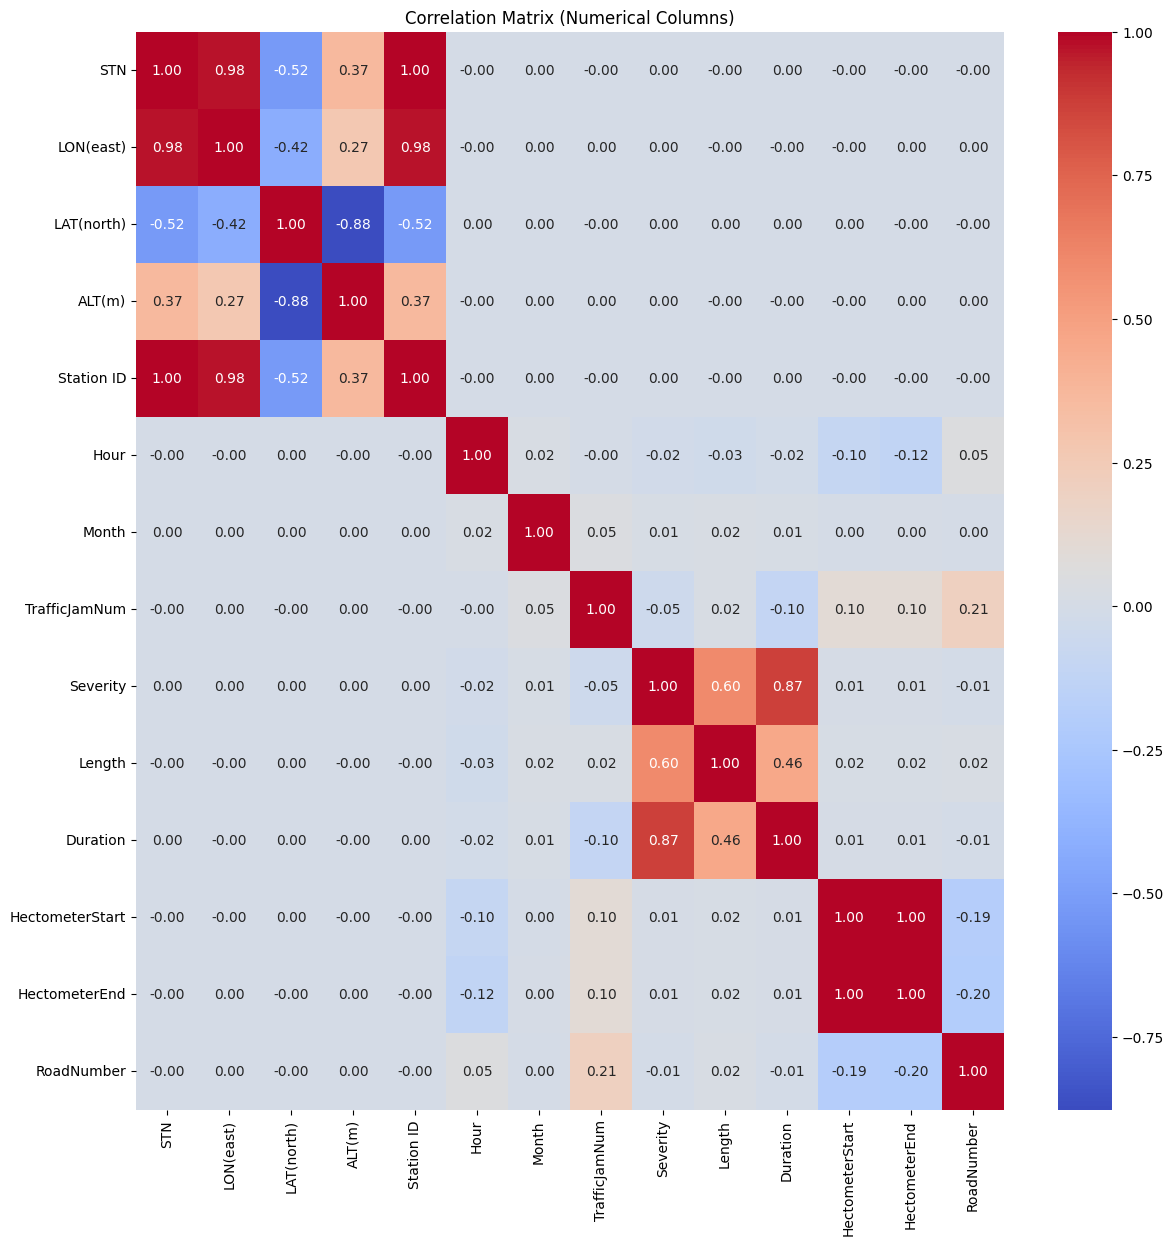

In [52]:
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64', 'int32'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

Still no relevant correlation :-(

### Left join



In [53]:
merged_left_test = pd.merge(merged_weather_data, filtered_traffic, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "left")
nan_columns = merged_left_test.columns[merged_left_test.isna().any()]

print(merged_left_test[nan_columns].isna().sum())

TrafficJamNum          358950
StartDate              358950
EndDate                358950
StartTime              358950
EndTime                358950
Severity               358950
Length                 358950
Duration               358950
HectometerStart        358950
HectometerEnd          358950
RoadLetter             358950
RoadNumber             358950
RoadDescr              358950
HectometerDirection    358950
RoadSectionFrom        358950
RoadSectionTo          358950
MainRoadFrom           358950
MainRoadTo             358950
CauseCodeDescr         358950
CauseClass             358950
CauseCodeClass         358950
CauseCode              358950
Cause_1                358950
Cause_2                358950
Cause_3                358950
Cause_4                358950
StartDateTime          358950
EndDateTime            358950
dtype: int64


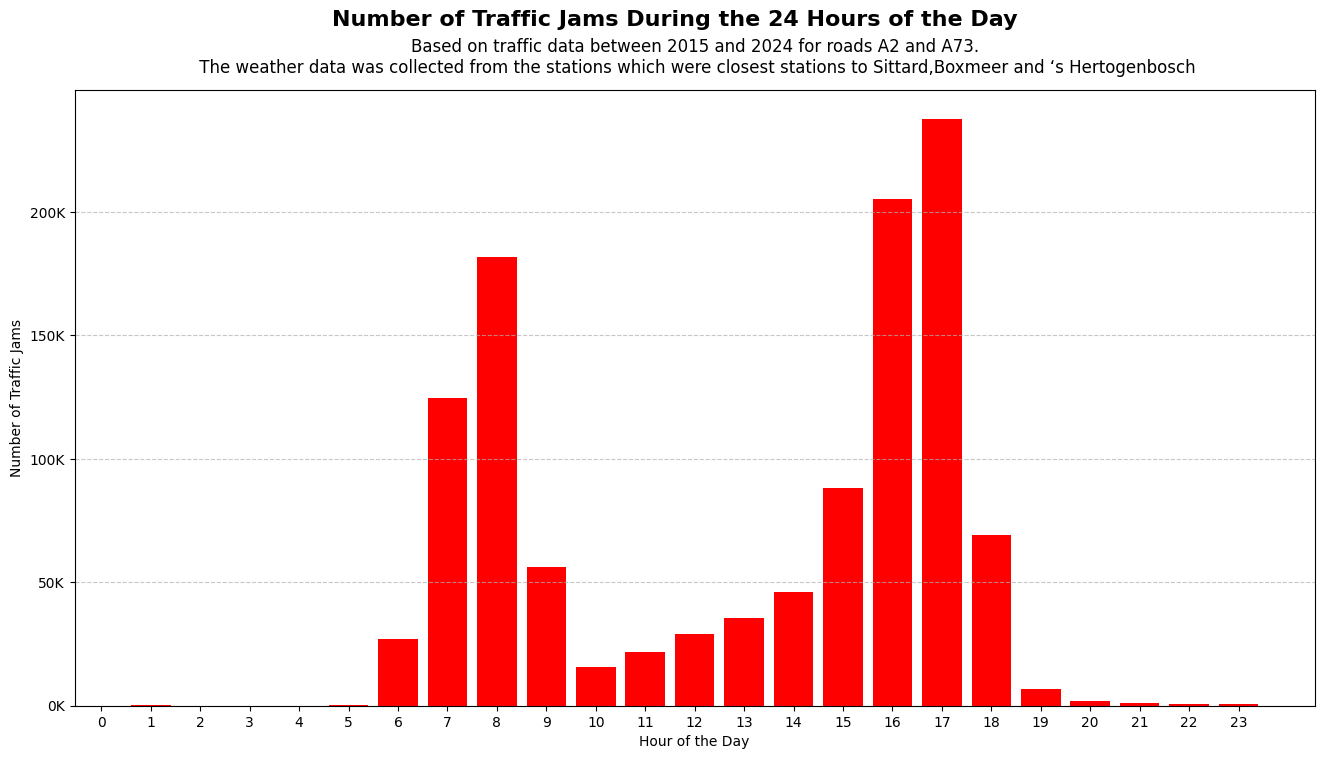

In [54]:
from matplotlib.ticker import FuncFormatter

hourly_counts_2 = merged_left_test[merged_left_test["Duration"]>0]
hourly_counts_2 = hourly_counts_2['Hour'].value_counts().sort_index()
plt.figure(figsize=(16, 8))
plt.bar(hourly_counts_2.index, hourly_counts_2.values, color='red')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Traffic Jams')

# Define a function to format the y-axis labels
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

formatter = FuncFormatter(thousands)

plt.gca().yaxis.set_major_formatter(formatter)

plt.suptitle('Number of Traffic Jams During the 24 Hours of the Day', fontsize=16, fontweight='bold')
plt.title('Based on traffic data between 2015 and 2024 for roads A2 and A73.\n The weather data was collected from the stations which were closest stations to Sittard,Boxmeer and ‘s Hertogenbosch\n', y=0.98)
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Creating a labels for the traffic duration

To classify traffic duration in an attempt to facilitate easier predicion, we will be assingning different labels to each record depending on the minutes spent in the traffic jam. Therefore, the categories will be named and assigned based on the following ranges:
* none - 0
* light - 15 minutes 
* medium - 30 minutes
* heavy - 1 hour
* extreme - 1 hour +

    

In [55]:
import numpy as np

# Define the bins and their labels
bins = [-np.inf, 0, 15, 30, np.inf]
labels = ['none', 'light', 'medium', 'heavy']

# Create the new column
merged_left_test['Duration Category'] = pd.cut(merged_left_test['Duration'].fillna(0), bins=bins, labels=labels)

# Replace NaN values with 'none'
merged_left_test['Duration Category'].fillna('none', inplace=True)
merged_left_test['Length'].fillna(0, inplace=True)
merged_left_test['Severity'].fillna(0, inplace=True)


merged_left_test.head()

C:\Users\zashe\AppData\Local\Temp\ipykernel_25028\3828671370.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_left_test['Duration Category'].fillna('none', inplace=True)
C:\Users\zashe\AppData\Local\Temp\ipykernel_25028\3828671370.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,CauseClass,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none


In [56]:
# Define the mapping
category_mapping = {'none': 0, 'light': 1, 'medium': 2, 'heavy': 3}

# Apply the mapping to the 'Duration Category' column
merged_left_test['encoded_type'] = merged_left_test['Duration Category'].map(category_mapping)

# Convert the 'encoded_type' column to integer
merged_left_test['encoded_type'] = merged_left_test['encoded_type'].astype(int)

# Display a sample of the DataFrame
merged_left_test.sample(10)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,CauseCodeClass,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type
1028816,380,5.762,50.906,114.3,Maastricht,2016-02-16,380,16,2,1881281.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2016-02-16 16:50:00,2016-02-16 16:59:41,light,1
739415,375,5.707,51.659,22.0,Volkel,2023-11-09,375,16,11,3815707.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-11-09 16:46:31,2023-11-09 16:54:02,light,1
981460,377,5.763,51.198,30.0,Ell,2023-09-17,377,4,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0
1329155,391,6.197,51.498,19.5,Arcen,2018-03-27,391,17,3,2313036.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-03-27 17:19:00,2018-03-27 17:29:30,light,1
1200999,380,5.762,50.906,114.3,Maastricht,2023-03-06,380,17,3,3417187.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-03-06 17:06:28,2023-03-06 17:55:03,heavy,3
637452,375,5.707,51.659,22.0,Volkel,2020-10-13,375,12,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0
179373,356,5.146,51.859,0.7,Herwijnen,2022-10-28,356,14,10,3245198.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-10-28 14:41:28,2022-10-28 15:37:01,heavy,3
212119,356,5.146,51.859,0.7,Herwijnen,2023-06-07,356,7,6,3574376.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-06-07 07:31:26,2023-06-07 07:41:00,light,1
385261,370,5.377,51.451,22.6,Eindhoven,2020-09-13,370,4,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0
180260,356,5.146,51.859,0.7,Herwijnen,2022-11-02,356,17,11,3253849.0,...,[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-11-02 17:22:28,2022-11-02 17:41:00,medium,2


In [57]:
merged_left_test["Duration Category"].value_counts()

Duration Category
light     821166
none      358950
heavy     172854
medium    155166
Name: count, dtype: int64

In [58]:
#import numpy as np

# Define the bins and their labels
#bins = [0, 5, 15, 30, np.inf]
#labels = ['light', 'medium', 'heavy', 'extreme']

# Create the new column
#merged_data['Duration Category'] = pd.cut(merged_data['Duration'].fillna(0), bins=bins, labels=labels)

# Replace NaN values with 'none'
#merged_data.head()

In [59]:
# Define the mapping
#category_mapping = {'light': 1, 'medium': 2, 'heavy': 3, 'extreme': 4}

# Apply the mapping to the 'Duration Category' column
#merged_data['encoded_type'] = merged_data['Duration Category'].map(category_mapping)

# Convert the 'encoded_type' column to integer
#merged_data['encoded_type'] = merged_data['encoded_type'].astype(int)

# Display a sample of the DataFrame
#merged_data.sample(10)

In [60]:
#merged_data["Duration Category"].value_counts()

### Adding holidays

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the range of years
start_year = 2015
end_year = 2024

# Create an empty list to store the scraped data
data = []

# Iterate over the years
for year in range(start_year, end_year + 1):
    # URL of the webpage containing the table for the current year
    url = f'https://www.timeanddate.com/holidays/netherlands/{year}?hol=9'

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the webpage
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table element with ID 'holidays-table'
        table = soup.find('table', id='holidays-table')

        # Check if the table is found
        if table:
            # Extract the table rows
            rows = table.find_all('tr')

            # Iterate over the rows and extract the data
            for row in rows:
                # Extract the table cells (columns) from each row
                cells = row.find_all(['th', 'td'])

                # Extract text from each cell and append it to the data list
                row_data = [cell.get_text(strip=True) for cell in cells]
                data.append([year] + row_data)  # Include the year as the first element
        else:
            print(f'Table with ID "holidays-table" not found for the year {year}.')
    else:
        print(f'Failed to retrieve webpage for the year {year}:', response.status_code)

# Create a DataFrame from the scraped data
columns = ['Year', 'Date', 'Day', 'Name', 'Type']
holiday = pd.DataFrame(data, columns=columns)
holiday = holiday.iloc[1:]

# Display the DataFrame
holiday.dropna().reset_index(drop=True)
holiday = holiday[holiday['Type']=='Public Holiday']
holiday = holiday[['Year', 'Date']]
holiday[['Day', 'Month']] = holiday['Date'].str.split(expand=True)
holiday['Month'].unique()

month_map = {
    'jan': '01', 'feb': '02', 'mrt': '03', 'apr': '04', 'mei': '05', 'jun': '06',
    'jul': '07', 'aug': '08', 'sep': '09', 'okt': '10', 'nov': '11', 'dec': '12'
}

#Mapping the 'Month' column to numerical values using the dictionary
holiday['Month'] = holiday['Month'].map(month_map)

#Making the day into two digits format
holiday['Day'] = holiday['Day'].astype(str).str.zfill(2)

#Assembling the date
holiday['Date'] = holiday['Year'].astype(str) + '-' + holiday['Month'] + '-' + holiday['Day']
holiday['Date'] = pd.to_datetime(holiday['Date'])
merged_left_test['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_left_test['Date (YYYY-MM-DD)'])


holiday = holiday.drop(columns=['Year', 'Day', 'Month'])
holiday['IsHoliday'] = 1

merged_left_test = pd.merge(merged_left_test, holiday, left_on='Date (YYYY-MM-DD)', right_on='Date', how='left')

# Fill missing values in 'IsHoliday' with 0 and drop the extra 'Date' column
merged_left_test['IsHoliday'] = merged_left_test['IsHoliday'].fillna(0).astype(int)
merged_left_test = merged_left_test.drop(columns=['Date'])

In [62]:
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965136.0,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965220.0,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965068.0,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965149.0,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0


In [63]:
holiday.info()
merged_left_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 3 to 378
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       102 non-null    datetime64[ns]
 1   IsHoliday  102 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508136 entries, 0 to 1508135
Data columns (total 40 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   STN                  1508136 non-null  int64         
 1   LON(east)            1508136 non-null  float64       
 2   LAT(north)           1508136 non-null  float64       
 3   ALT(m)               1508136 non-null  float64       
 4   NAME                 1508136 non-null  object        
 5   Date (YYYY-MM-DD)    1508136 non-null  datetime64[ns]
 6   Station ID           1508136 non-null  int64         
 7   Hour   

### Adding football matches of FC Den Bosch that were in 's-Hertogenbosch from 2015 until the end of the 2023-24 season

The matches were scraped from Flashscore.

In [64]:
# Read match dates from match_dates.txt
with open('match_dates.txt', 'r', encoding='utf-8') as file:
    match_dates = file.readlines()
# Remove any extra whitespace or newline characters
match_dates = [date.strip() for date in match_dates]

# Read participants from participants.txt
with open('participants.txt', 'r', encoding='utf-8') as file:
    participants = file.readlines()
# Remove any extra whitespace or newline characters
participants = [participant.strip() for participant in participants]

# Create a DataFrame
football = pd.DataFrame({
    'Date': match_dates,
    'Team': participants
})

# Display the DataFrame
football

,Date,Team
0,10.05. 20:00,FC Eindhoven
1,03.05. 20:00,FC Den Bosch
2,26.04. 20:00,VVV-Venlo
3,19.04. 20:00,FC Den Bosch
4,15.04. 20:00,Jong Utrecht
...,...,...
435,29.08.2014,FC Den Bosch
436,25.08.2014,FC Emmen
437,22.08.2014,FC Den Bosch
438,15.08.2014,FC Den Bosch


In [65]:
# By browsig the scraped text files, I could see some dates were scraped improperly.
football['Date'] = football['Date'].str.replace('01.11.2023Na ET', '01.11.2023').str.replace('23.09.2015Na ET', '23.09.2015')

# Apart from 'FC Den Bosch', the team is also sometimes shown as 'FC Den Bosch (Ned)', which is when the match is friendly and the teams are often from different countries. We will fix this.
football['Team'] = football['Team'].str.replace('FC Den Bosch (Ned)', 'FC Den Bosch')

# The date of the matches played this year (first 19 rows) is displayed as mm.dd. hh:mm, while the dates before that are dd.mm.yyyy
# We need all dates as dd.mm.yyyy
football['Date'] = football['Date'].str.replace('10.05. 20:00', '10.05.2024').str.replace('03.05. 20:00', '03.05.2024').str.replace('26.04. 20:00', '26.04.2024').str.replace('19.04. 20:00', '19.04.2024').str.replace('15.04. 20:00', '15.04.2024').str.replace('08.04. 20:00', '08.04.2024').str.replace('29.03. 20:00', '29.03.2024').str.replace('23.03. 20:00', '23.03.2024').str.replace('15.03. 20:00', '15.03.2024').str.replace('08.03. 20:00', '08.03.2024').str.replace('04.03. 20:00', '04.03.2024').str.replace('27.02. 13:00', '27.02.2024').str.replace('23.02. 20:00', '23.02.2024').str.replace('16.02. 20:00', '16.02.2024').str.replace('11.02. 12:15', '11.02.2024').str.replace('02.02. 20:00', '02.02.2024').str.replace('26.01. 20:00', '26.01.2024').str.replace('19.01. 20:00', '19.01.2024').str.replace('15.01. 20:00', '15.01.2024')

# Finally, we will filter only for Team = FC Den Bosch (those are the games when Den Bosch were playing at home)
football = football[football['Team'] == 'FC Den Bosch']

# We are interested in the dates of those games, so we will make a subset with only the dates.
football_dates = football['Date']
football_dates = pd.to_datetime(football_dates, format='%d.%m.%Y')
football_dates = football_dates[football_dates.dt.year >= 2015]
football_dates = pd.DataFrame(football_dates)

In [66]:
football_dates['WeekdayyName'] = football_dates['Date'].dt.day_name()
football_dates

,Date,WeekdayyName
1,2024-05-03,Friday
3,2024-04-19,Friday
6,2024-03-29,Friday
8,2024-03-15,Friday
10,2024-03-04,Monday
...,...,...
410,2015-03-13,Friday
412,2015-02-27,Friday
416,2015-02-09,Monday
418,2015-01-23,Friday


In [67]:
football_dates.loc[(football_dates['WeekdayyName']=='Saturday')|(football_dates['WeekdayyName']=='Sunday'), 'Hour'] = 2
football_dates["Hour"] = football_dates["Hour"].fillna(7)
football_dates['IsMatch'] = 1
football_dates['MainRoadTo'] = "'s-Hertogenbosch"
football_dates['MainRoadFrom'] = "'s-Hertogenbosch"
football_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 1 to 419
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          207 non-null    datetime64[ns]
 1   WeekdayyName  207 non-null    object        
 2   Hour          207 non-null    float64       
 3   IsMatch       207 non-null    int64         
 4   MainRoadTo    207 non-null    object        
 5   MainRoadFrom  207 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 11.3+ KB


In [68]:
merged_left_test = pd.merge(merged_left_test, football_dates, left_on=['Date (YYYY-MM-DD)', 'MainRoadTo', 'Hour'], right_on=['Date', 'MainRoadTo', 'Hour'], how='left')
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,Date,WeekdayyName,IsMatch,MainRoadFrom_y
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,NaN,none,0,1,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965136.0,...,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,NaT,NaN,NaN,NaN
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965220.0,...,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,NaT,NaN,NaN,NaN
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965068.0,...,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,NaT,NaN,NaN,NaN
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965149.0,...,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,NaT,NaN,NaN,NaN


In [69]:
columns_to_drop = ['MainRoadFrom_y', 'WeekdayyName', 'Date']
merged_left_test.drop(columns=columns_to_drop, inplace=True)

In [70]:
merged_left_test['IsMatch'] = merged_left_test['IsMatch'].fillna(0)
merged_left_test['IsMatch'].value_counts()

IsMatch
0.0    1507962
1.0        174
Name: count, dtype: int64

In [71]:
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965136.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,0.0
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965220.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,0.0
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965068.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,0.0
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965149.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,0.0


Now, we will add a column called 'Matchday' to the merged data, which will have a value of 0 if there is no game on that day and 1 if there is.

In [72]:
# merged_left_test['Matchday'] = merged_left_test['Matchday'] = np.where(
#     (merged_left_test['Date (YYYY-MM-DD)'].isin(football_dates)) &
#     ((merged_left_test['MainRoadFrom'] == "'s-Hertogenbosch") | (merged_left_test['MainRoadTo'] == "'s-Hertogenbosch")),
#     1,
#     0
# )
# merged_left_test['Matchday'].value_counts()

### Adding road letter and number, based on station ID for days without traffic

In [73]:
a73stations = [375, 391, 380]
a2stations = [377, 370, 356]

#Fill RoadNumber with 73 where stn is 45 and RoadNumber is null
merged_left_test.loc[(merged_left_test['STN'].isin(a73stations)) & (merged_left_test['RoadNumber'].isnull()), 'RoadNumber'] = 73
# Fill RoadNumber with 2 where stn is 70 and RoadNumber is null
merged_left_test.loc[(merged_left_test['STN'].isin(a2stations)) & (merged_left_test['RoadNumber'].isnull()), 'RoadNumber'] = 2
merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,none,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965136.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,0.0
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965220.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,0.0
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965068.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,0.0
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965149.0,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,0.0


In [74]:
merged_left_test["RoadNumber"].isna().sum()

0

### Adding day of the week

In [75]:
# Convert 'Date (YYYY-MM-DD)' column to datetime if it's not already in datetime format
merged_data['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_data['Date (YYYY-MM-DD)'])

# Add weekday and weekday name columns
merged_data['WeekdayName'] = merged_data['Date (YYYY-MM-DD)'].dt.day_name()
merged_data['Weekday'] = merged_data['Date (YYYY-MM-DD)'].dt.weekday

# Ensure 'StartDate' column contains datetime objects
merged_data['StartDate'] = pd.to_datetime(merged_left_test['StartDate'])

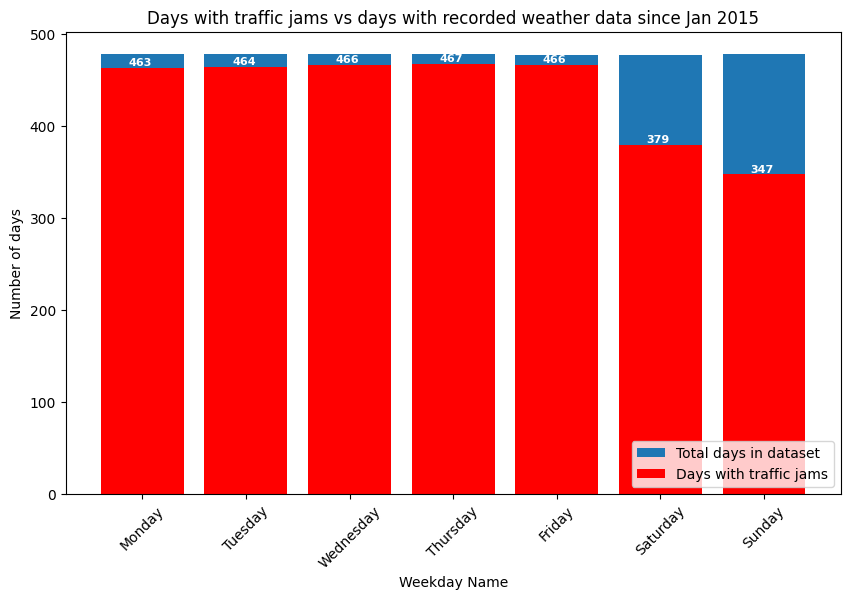

In [76]:
import matplotlib.pyplot as plt

# Convert 'Date (YYYY-MM-DD)' column to datetime if it's not already in datetime format
merged_left_test['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_left_test['Date (YYYY-MM-DD)'])

# Add weekday and weekday name columns
merged_left_test['WeekdayName'] = merged_left_test['Date (YYYY-MM-DD)'].dt.day_name()
merged_left_test['Weekday'] = merged_left_test['Date (YYYY-MM-DD)'].dt.weekday

# Ensure 'StartDate' column contains datetime objects
merged_left_test['StartDate'] = pd.to_datetime(merged_left_test['StartDate'])

# Unique weekdays in the dataset with recorded weather data
unique_dates_weekdays = merged_left_test.drop_duplicates(subset=['Date (YYYY-MM-DD)', 'WeekdayName'])
min_date = merged_left_test['StartDate'].min()  # Compute min date
unique_dates_weekdays = unique_dates_weekdays[unique_dates_weekdays['Date (YYYY-MM-DD)'] >= min_date]
value_counts = unique_dates_weekdays['WeekdayName'].value_counts()

# Unique days with traffic jams (one or more)
unique_weekdays_with_traffic = merged_left_test.drop_duplicates(subset=['StartDate', 'WeekdayName']) 
value_counts_traffic = unique_weekdays_with_traffic['WeekdayName'].value_counts()

# Sort by weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_value_counts = value_counts.reindex(weekday_order)
sorted_value_counts_traffic = value_counts_traffic.reindex(weekday_order)

# Plotting
plt.figure(figsize=(10, 6))
bars1 = plt.bar(sorted_value_counts.index, sorted_value_counts.values)
bars2 = plt.bar(sorted_value_counts_traffic.index, sorted_value_counts_traffic.values, color='red')

# Adding labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 3.0, yval, int(yval), va='bottom', fontsize=8, color='white', fontweight='bold')

plt.xlabel('Weekday Name')
plt.ylabel('Number of days')
plt.title('Days with traffic jams vs days with recorded weather data since Jan 2015')
plt.xticks(rotation=45)
plt.legend([bars1, bars2], ['Total days in dataset', 'Days with traffic jams'], loc='lower right')
plt.show()


### Adding season

In [77]:
# Define a function to determine the season based on the month
def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
merged_left_test['Season Numerical'] = merged_left_test['Date (YYYY-MM-DD)'].dt.month.apply(get_season_numerical)

merged_left_test.sample(3)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,Cause_4,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch,WeekdayName,Weekday,Season Numerical
626768,375,5.707,51.659,22.0,Volkel,2020-01-16,375,6,1,2719481.0,...,Hoge intensiteit,2020-01-16 06:57:00,2020-01-16 07:11:02,light,1,0,0.0,Thursday,3,0
437556,370,5.377,51.451,22.6,Eindhoven,2022-12-09,370,17,12,3316511.0,...,Hoge intensiteit,2022-12-09 17:11:29,2022-12-09 17:15:03,light,1,0,0.0,Friday,4,0
518680,375,5.707,51.659,22.0,Volkel,2015-10-27,375,6,10,1819933.0,...,Hoge intensiteit,2015-10-27 06:46:00,2015-10-27 06:47:18,light,1,0,0.0,Tuesday,1,3


#### For inner join

In [78]:
# Define a function to determine the season based on the month
merged_data['Date (YYYY-MM-DD)'] = pd.to_datetime(merged_data['Date (YYYY-MM-DD)'])

def get_season_numerical(month):
    if month in [12, 1, 2]:
        return 0  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    else:
        return 3  # Autumn
    
merged_data['Season Numerical'] = merged_data['Date (YYYY-MM-DD)'].dt.month.apply(get_season_numerical)

merged_data.sample(3)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,CauseCode,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,WeekdayName,Weekday,Season Numerical
310986,370,5.377,51.451,22.6,Eindhoven,2022-09-02,370,21,9,3160156,...,RWK,Wegwerkzaamheden,Werkzaamheden,Werkzaamheden,Aanleg en gepland onderhoud,2022-09-02 21:34:24,2022-09-02 21:49:08,Friday,4,3
831180,380,5.762,50.906,114.3,Maastricht,2018-11-26,380,17,11,2453726,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2018-11-26 17:34:00,2018-11-26 17:39:43,Monday,0,3
1129901,391,6.197,51.498,19.5,Arcen,2023-10-02,391,6,10,3742416,...,001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2023-10-02 06:51:25,2023-10-02 06:56:01,Monday,0,3


### Add a new column 'Week Number' containing the week number corresponding to each date

In [79]:
merged_left_test['WeekNumber'] = merged_left_test['Date (YYYY-MM-DD)'].dt.isocalendar().week
merged_left_test['WeekNumber'] = merged_left_test['WeekNumber'].astype(int)

merged_left_test

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,StartDateTime,EndDateTime,Duration Category,encoded_type,IsHoliday,IsMatch,WeekdayName,Weekday,Season Numerical,WeekNumber
0,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,1,1,NaN,...,NaN,NaN,none,0,1,0.0,Thursday,3,0,1
1,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,19,1,NaN,...,NaN,NaN,none,0,1,0.0,Thursday,3,0,1
2,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,18,1,NaN,...,NaN,NaN,none,0,1,0.0,Thursday,3,0,1
3,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,17,1,NaN,...,NaN,NaN,none,0,1,0.0,Thursday,3,0,1
4,356,5.146,51.859,0.7,Herwijnen,2015-01-01,356,16,1,NaN,...,NaN,NaN,none,0,1,0.0,Thursday,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508131,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965136.0,...,2024-02-29 09:15:29,2024-02-29 09:28:00,light,1,0,0.0,Thursday,3,0,9
1508132,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965220.0,...,2024-02-29 09:36:28,2024-02-29 09:42:00,light,1,0,0.0,Thursday,3,0,9
1508133,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965068.0,...,2024-02-29 09:03:29,2024-02-29 09:06:00,light,1,0,0.0,Thursday,3,0,9
1508134,391,6.197,51.498,19.5,Arcen,2024-02-29,391,9,2,3965149.0,...,2024-02-29 09:18:28,2024-02-29 09:25:03,light,1,0,0.0,Thursday,3,0,9


In [80]:
#inner
merged_data['WeekNumber'] = merged_data['Date (YYYY-MM-DD)'].dt.isocalendar().week
merged_data['WeekNumber'] = merged_data['WeekNumber'].astype(int)

merged_data.sample(3)

,STN,LON(east),LAT(north),ALT(m),NAME,Date (YYYY-MM-DD),Station ID,Hour,Month,TrafficJamNum,...,Cause_1,Cause_2,Cause_3,Cause_4,StartDateTime,EndDateTime,WeekdayName,Weekday,Season Numerical,WeekNumber
900796,380,5.762,50.906,114.3,Maastricht,2022-12-20,380,7,12,3331255,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2022-12-20 07:33:27,2022-12-20 07:37:00,Tuesday,1,0,51
396332,375,5.707,51.659,22.0,Volkel,2015-12-08,375,17,12,1850610,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2015-12-08 17:45:00,2015-12-08 17:52:30,Tuesday,1,0,50
584423,377,5.763,51.198,30.0,Ell,2015-10-14,377,17,10,1813250,...,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit,2015-10-14 17:08:00,2015-10-14 17:11:49,Wednesday,2,3,42


### Adding day of the year

In [81]:
merged_left_test['DayofYear'] = merged_left_test['Date (YYYY-MM-DD)'].dt.dayofyear

In [82]:
# For inner
merged_data['DayofYear'] = merged_data['Date (YYYY-MM-DD)'].dt.dayofyear

### Adding day of the month

In [83]:
merged_left_test['DayofMonth'] = merged_left_test['Date (YYYY-MM-DD)'].dt.day

### Adding year

In [84]:
merged_left_test['Year'] = merged_left_test['Date (YYYY-MM-DD)'].dt.year

### Direction

In [85]:
leftnew = leftnew[["StartDate", "Hour", "HectometerDirectionNum"]]
hectomerge = pd.merge(merged_left_test, leftnew, left_on=['Date (YYYY-MM-DD)', 'Hour'], right_on=['StartDate', 'Hour'], how = "left")
hectomerge

MemoryError: Unable to allocate 1017. MiB for an array with shape (4, 33319254) and data type int64

# Modelling

## Random Forest



In [ ]:
# desired size per class
desired_size_per_class = 155166
# Sampling the data for each class to achieve the desired number of rows
downsampled_data = pd.concat([merged_left_test[merged_left_test['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in category_mapping])
print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

(620664, 62)
Duration Category
none      155166
light     155166
medium    155166
heavy     155166
Name: count, dtype: int64


#### Left join

In [ ]:
# £STN, LON(east) (for whatever reason wtf), Station ID, Hour, Hourly average wind speed, Wind speed, Highest Wind Gust, Temperature, Visibility, 
# Month, RoadNumber, Weekday, WeekNumber, DayofYear, DayofMonth, Year
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()

merged_data_sample = downsampled_data.copy() #.sample(n=100000, random_state=42) # sampling because it could not load

target = "encoded_type"
y = merged_data_sample[target]

features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth']
X = merged_data_sample[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.660759024594588

Due to increased accuracy in Random Forest at this stage, we will proceed further with the evaluation in this model.

### Evaluation

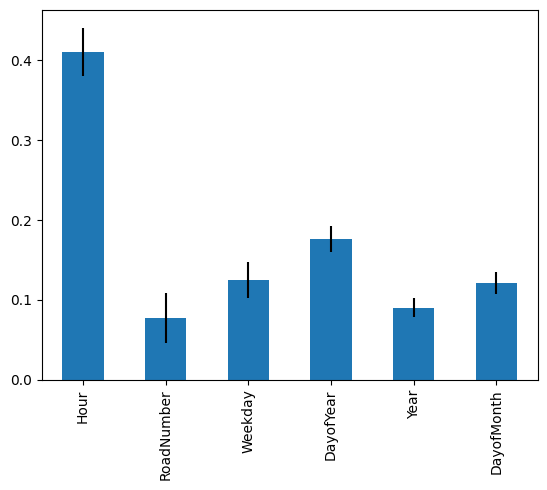

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
forest_importances = pd.Series(random_forest.feature_importances_, index=features)
standard_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
plt.figure()
forest_importances.plot.bar(yerr=standard_deviation)
plt.show()

We can see that the prediction is mainly relying on the `Hour` feature as it seems to contribute in proportion of about 90% to the final result. The other features are quite insignificant in comparison to this one. Let's inspect the relationship between the hour and the number of traffic jams:

As expected, it seems that most traffic jams happen during the morning, mainly between 7 and 9, as well as at the end of the workday, approximately from 16 to 18. This matches perfectly with the 9 to 17 schedule most people work by.

### Classification Matrix

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

predictions = random_forest.predict(X_test)
# Convert unique values to a list of strings
target_names = [str(label) for label in merged_data_sample["Duration Category"].unique()]
 
# Assuming predictions and y_test are your predicted and true labels
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

              precision    recall  f1-score   support

        none       0.99      0.98      0.99     30892
       light       0.54      0.51      0.53     30970
      medium       0.54      0.58      0.56     31313
       heavy       0.57      0.57      0.57     30958

    accuracy                           0.66    124133
   macro avg       0.66      0.66      0.66    124133
weighted avg       0.66      0.66      0.66    124133



In [ ]:
'Temperature (0.1°C)', 'Hour', 'RoadNumber', 'Weekday' 'DayofYear', 'Year'

temperature = 50
hour = 9
road = 2
weekday = 2
 
 
X_inference = pd.DataFrame([{"Temperature (0.1°C)": temperature, 
                             "Hour": hour,
                             "RoadNumber": road,
                             "Weekday": weekday}])
 
prediction = random_forest.predict_proba(X_inference)
result = pd.DataFrame()
result["Class"] = merged_data_sample["Duration Category"].unique()
result["Probability"] = prediction[0]
result


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Temperature (0.1°C)
Feature names seen at fit time, yet now missing:
- DayofMonth
- DayofYear
- Year


## Support Vector Machines

In [ ]:
# desired size per class
desired_size_per_class = 10000
# Sampling the data for each class to achieve the desired number of rows
downsampled_data = pd.concat([merged_left_test[merged_left_test['Duration Category'] == label].sample(n=desired_size_per_class, replace=False)
                              for label in category_mapping])
print(downsampled_data.shape)
print(downsampled_data['Duration Category'].value_counts())

(40000, 62)
Duration Category
none      10000
light     10000
medium    10000
heavy     10000
Name: count, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()


merged_data_sample = downsampled_data.copy()

target = "encoded_type"
y = merged_data_sample[target]

#features = ['Hourly Average Wind Speed (m/s)','Highest Wind Gust (m/s) ', 'Temperature (0.1°C)', 'Hour']
features = ['Hour', 'RoadNumber', 'Weekday', 'DayofYear', 'Year', 'DayofMonth']
X = merged_data_sample[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model finding accuracy
svc = SVC(kernel='rbf')

# Fit the model to the training data
svc.fit(X_train_scaled, y_train)

# Make predictions on the test data
svc_pred = svc.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_svc = accuracy_score(y_test, svc_pred)
print("Accuracy:", accuracy_svc)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.491125
